### 単純多数決(単記投票)による選好プロファイルの集約
- 選択肢の集合を $O = \{a, b, c\}$ とする。
- 各投票者は自身の選好順序において最上位の選択肢に対して，1票だけ投票する。
- 結果として得票数が多い順に選択肢を並べたときの順序を社会選好順序とする。

voter 0: &emsp;a $\succ$ b $\succ$ c  
voter 1: &emsp;a $\succ$ b $\succ$ c  
voter 2: &emsp;a $\succ$ b $\succ$ c  
voter 3: &emsp;a $\succ$ b $\succ$ c  
voter 4: &emsp;a $\succ$ b $\succ$ c  
$\quad \vdots$

votes:  {'a': 86, 'b': 77, 'c': 35}


a $\succ$ b $\succ$ c:&emsp; 30 voters  
a $\succ$ c $\succ$ b:&emsp; 56 voters  
c $\succ$ a $\succ$ b:&emsp; 7 voters  
c $\succ$ b $\succ$ a:&emsp; 28 voters  
b $\succ$ c $\succ$ a:&emsp; 62 voters  
b $\succ$ a $\succ$ c:&emsp; 15 voters

social order: &emsp;a $\succ$ b $\succ$ c

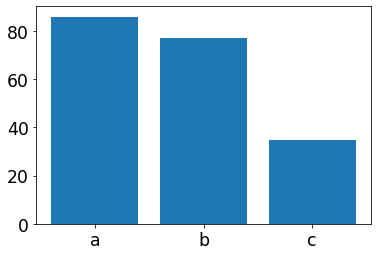

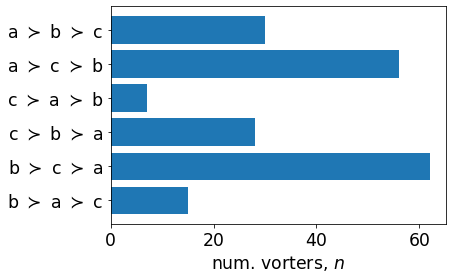

In [1]:
import itertools as it
import numpy as np
# from scipy.stats import randint
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import display_markdown

plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize'] = 'xx-large' #'large'

alternatives = ('a', 'b', 'c') 
prefs = np.array(tuple(it.permutations(alternatives)))

if True: # 選好タイプごとの集計に従ってプロファイルを生成する場合
    # tally = {('a', 'b', 'c'): 37,
    #          ('a', 'c', 'b'): 37,
    #          ('c', 'a', 'b'): 24,
    #          ('c', 'b', 'a'): 23,
    #          ('b', 'c', 'a'): 41,
    #          ('b', 'a', 'c'): 18}

    tally = {('a', 'b', 'c'): 30,
             ('a', 'c', 'b'): 56,
             ('c', 'a', 'b'): 7,
             ('c', 'b', 'a'): 28,
             ('b', 'c', 'a'): 62,
             ('b', 'a', 'c'): 15}

    profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))

else: # 一様分布に従う確率変数によってプロファイルを生成する場合
    num_voters = 100 #5 #0
    profile_idx = scipy.stats.randint.rvs(0, len(prefs), size=num_voters)
    profile = prefs[profile_idx]

    tally = {tuple(p): 0 for p in prefs}
    for p in profile:
        tally[tuple(p)] += 1

pref_str = lambda p: r' $\succ$ '.join(p)
display_markdown('  \n'.join(f'voter {i}: &emsp;' + pref_str(p) for i, p in enumerate(profile) if i < 5)
                 + '  \n' + r'$\quad \vdots$', raw=True)
votes = {x: 0 for x in alternatives}
pos = 0 #
for x in profile[:, pos]:
    votes[x] += 1
print('votes: ', votes)

display_markdown('  \n'.join(pref_str(k) + f':&emsp;{v: 2d} voters' for k,v in tally.items()), raw=True)


idx = np.argsort(tuple(votes.values()))
display_markdown('social order: &emsp;' + pref_str(np.array(tuple(votes.keys()))[idx[::-1]]), raw=True)
# 単純化のため，得票数が等しい場合は考慮しない

plt.figure()
plt.bar(votes.keys(), votes.values())

plt.figure()
plt.barh(np.arange(len(tally.keys()))[::-1], 
         np.array(tuple(tally.values())),
         tick_label=[pref_str(k) for k in tally.keys()])
lb = plt.xlabel('num. vorters, $n$')

#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。


選択肢を並べたシーケンス  `('a', 'b', 'c')` で選好順序を表現する。シーケンスにおける要素のインデックスが小さいほど，その要素の優先度が高いことを示すものとする。

In [51]:
display_markdown(pref_str(('a', 'b', 'c')), raw=True)

a $\succ$ b $\succ$ c

選好の記号 $\succ$ は `print()` では表示できないため，
[LaTeX の数式表記](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
を含む
[Markdown](https://ja.wikipedia.org/wiki/Markdown)  
の文字列を生成し，
[`display_markdown()`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display_markdown)
で表示する。


選好タイプごとの集計データ `tally` からのプロファイルの生成
```Python
    profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))
```
は次のように分解でき，`tally` の各 `key` ( `('a', 'b', 'c')`, `('a', 'c', 'b')`, ...) が，対応する `value` の値の個数 (30，56, ...)の分だけ並んだ配列となる。

In [2]:
tally = {('a', 'b', 'c'): 30,
         ('a', 'c', 'b'): 56,
         ('c', 'a', 'b'): 7,
         ('c', 'b', 'a'): 28,
         ('b', 'c', 'a'): 62,
         ('b', 'a', 'c'): 15}

profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))

r = tuple(it.repeat(p, v) for p, v in tally.items())
print('r == ', r) # イテレータの tuple
print('r[0] == ', r[0]) # イテレータ
t = tuple(r[0])
print('t ==', t) # イテレータから得られた要素を並べた tuple
print('len(t) ==', len(t)) # 
print('profile.shape ==', profile.shape)
print('sum(tally.values()) ==', sum(tally.values()))

r ==  (repeat(('a', 'b', 'c'), 30), repeat(('a', 'c', 'b'), 56), repeat(('c', 'a', 'b'), 7), repeat(('c', 'b', 'a'), 28), repeat(('b', 'c', 'a'), 62), repeat(('b', 'a', 'c'), 15))
r[0] ==  repeat(('a', 'b', 'c'), 30)
t == (('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'))
len(t) == 30
profile.shape == (198, 3)
sum(tally.values()) == 198


ありうる全ての選好タイプは，選択肢を並べて作れる全ての順列に対応する。

In [3]:
prefs = np.array(tuple(it.permutations(alternatives)))
print(repr(prefs))

array([['a', 'b', 'c'],
       ['a', 'c', 'b'],
       ['b', 'a', 'c'],
       ['b', 'c', 'a'],
       ['c', 'a', 'b'],
       ['c', 'b', 'a']], dtype='<U1')


numpy 配列の 
[integer array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing)
を利用すれば，一様分布に従う確率変数によって，ランダムに配列の要素を並べた配列を作れる


In [4]:
from scipy.stats import randint

idx = np.array((0, 0, 0,  2, 2))
print('prefs[idx] == \n' + repr(prefs[idx]))
print('prefs[idx].shape ==', prefs[idx].shape)
print('len(idx) ==', len(idx))

print()
rnd_idx = randint.rvs(0, len(prefs), size=10)
print('prefs[rnd_idx] == \n' + repr(prefs[rnd_idx]))
print('prefs[rnd_idx].shape ==', prefs[rnd_idx].shape)
print('len(rnd_idx) ==', len(rnd_idx))

print()
toss_out = np.array(('表', '裏'))
rnd_idx2 = randint.rvs(0, len(toss_out), size=8)
print('toss_out[rnd_idx2] == \n' +  repr(toss_out[rnd_idx2]))

prefs[idx] == 
array([['a', 'b', 'c'],
       ['a', 'b', 'c'],
       ['a', 'b', 'c'],
       ['b', 'a', 'c'],
       ['b', 'a', 'c']], dtype='<U1')
prefs[idx].shape == (5, 3)
len(idx) == 5

prefs[rnd_idx] == 
array([['a', 'c', 'b'],
       ['a', 'c', 'b'],
       ['a', 'c', 'b'],
       ['b', 'c', 'a'],
       ['a', 'c', 'b'],
       ['c', 'a', 'b'],
       ['c', 'a', 'b'],
       ['b', 'c', 'a'],
       ['b', 'c', 'a'],
       ['c', 'a', 'b']], dtype='<U1')
prefs[rnd_idx].shape == (10, 3)
len(rnd_idx) == 10

toss_out[rnd_idx2] == 
array(['表', '裏', '裏', '表', '裏', '表', '裏', '裏'], dtype='<U1')


集計データ
```Python
votes = {x: 0 for x in alternatives}
```
について，[辞書内包表記](https://docs.python.org/ja/3/glossary.html#term-dictionary-comprehension)
によって，初期化を行っている。

In [2]:
votes = {x: 0 for x in ('a', 'b', 'c')}
print(votes)

{'a': 0, 'b': 0, 'c': 0}


上記のプログラムにおいて，社会選好順序を表示する処理
```Python
    idx = np.argsort(tuple(votes.values()))
    display_markdown('social order: &emsp;' + pref_str(np.array(tuple(votes.keys()))[idx[::-1]]), raw=True)
```
では，得票数が多い順に選択肢を並べるために，
[`numpy.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
と 
[integer array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing)
を利用している。

In [25]:
import numpy as np

votes = {'a': 11, 'b': 33, 'c': 22}
print('votes.values() == ', votes.values())
print('votes.keys() == ', votes.keys())
arr_keys = np.array(tuple(votes.keys()))
arr_vals = np.array(tuple(votes.values()))
print('arr_vals == ', repr(arr_vals))
print('arr_keys == ', repr(arr_keys))
print()

idx = np.argsort(arr_vals)
print('idx == ', repr(idx))
print('idx[::-1] == ', repr(idx[::-1]))

print('\n昇順に並べる')
print('arr_vals[idx] == ', repr(arr_vals[idx])) # 昇順
print('arr_keys[idx] == ', repr(arr_keys[idx])) # 昇順

print('\n降順に並べる')
print('arr_vals[idx[::-1]] == ', repr(arr_vals[idx[::-1]])) # 降順
print('arr_keys[idx[::-1]] == ', repr(arr_keys[idx[::-1]])) # 降順



votes.values() ==  dict_values([11, 33, 22])
votes.keys() ==  dict_keys(['a', 'b', 'c'])
arr_vals ==  array([11, 33, 22])
arr_keys ==  array(['a', 'b', 'c'], dtype='<U1')

idx ==  array([0, 2, 1], dtype=int64)
idx[::-1] ==  array([1, 2, 0], dtype=int64)

昇順に並べる
arr_vals[idx] ==  array([11, 22, 33])
arr_keys[idx] ==  array(['a', 'c', 'b'], dtype='<U1')

降順に並べる
arr_vals[idx[::-1]] ==  array([33, 22, 11])
arr_keys[idx[::-1]] ==  array(['b', 'c', 'a'], dtype='<U1')
